In [50]:
#imports relevant libraries for task
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts/')))

In [53]:
# diplaying maximum column size
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

# Task 1: User Overview Analysis

In [54]:
#read the cleaned telecom data
cleaned_df = pd.read_csv('../data/cleaned_Telecom_data.csv')

In [56]:
# declare functions for processing each task!
def get_top_handsets(num):
        top_handset = cleaned_df['Handset Type'].value_counts().head(num)
        return top_handset
    
def get_top_manufacturers(num):
        top_handset = cleaned_df['Handset Manufacturer'].value_counts().head(num)
        return top_handset
    
def get_handset_group():
        top_3_manufacturers = get_top_manufacturers(3)

        manufacturers = cleaned_df.groupby("Handset Manufacturer")

        for column in top_3_manufacturers.index:
            result = manufacturers.get_group(column).groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(5)
            print(f">>>> { column } <<<<")
            print(result)
            print() 

Identify the top 10 handsets used by the customers

In [57]:
top_10_handsets = get_top_handsets(10)
pd.DataFrame(top_10_handsets)

,Handset Type
Huawei B528S-23A,19754
Apple iPhone 6S (A1688),9401
Apple iPhone 6 (A1586),9004
undefined,8960
Apple iPhone 7 (A1778),6301
Apple iPhone Se (A1723),5176
Apple iPhone 8 (A1905),4985
Apple iPhone Xr (A2105),4562
Samsung Galaxy S8 (Sm-G950F),4504
Apple iPhone X (A1901),3809


In [58]:
top_10_handsets.index

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object')

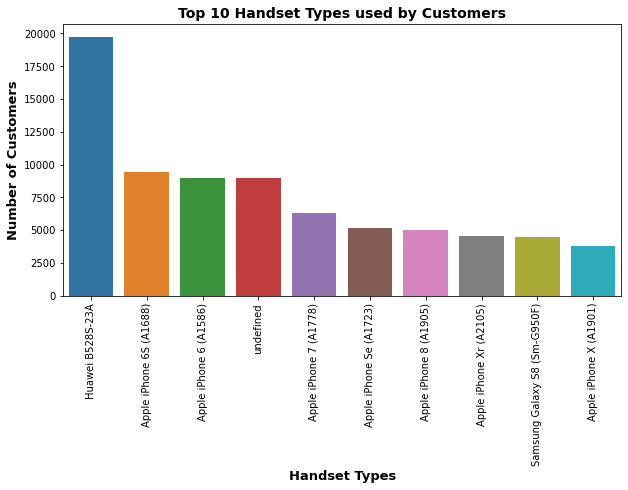

In [60]:
# Bar graph for top 10 handsets used by the customers
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handset Types used by Customers', size=14, fontweight="bold")
plt.xlabel('Handset Types', size=13, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Customers', size=13, fontweight="bold")
plt.show()

In [61]:
# top 3 manufactures used by customers from cleaned_df

top_3_manufacturers = get_top_manufacturers(3)
pd.DataFrame(top_3_manufacturers)

,Handset Manufacturer
Apple,59442
Samsung,40689
Huawei,34353


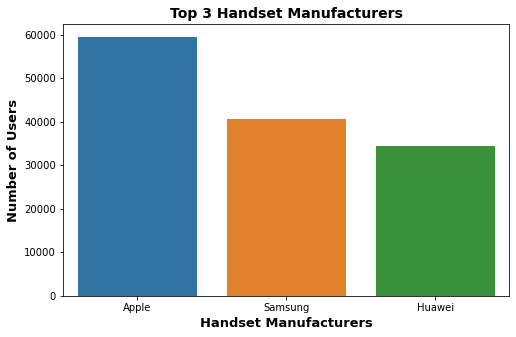

In [63]:
# Bar graph that sows the top 3 Handset Manufacturers

plt.figure(figsize=(8,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [64]:
# display handset group
get_handset_group()

>>>> Apple <<<<
Handset Type
Apple iPhone 6S (A1688)    6745
Apple iPhone 6 (A1586)     6246
Apple iPhone 7 (A1778)     4676
Apple iPhone Se (A1723)    3745
Apple iPhone 8 (A1905)     3536
Name: MSISDN/Number, dtype: int64

>>>> Samsung <<<<
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3233
Samsung Galaxy J5 (Sm-J530)     2742
Samsung Galaxy A5 Sm-A520F      2702
Samsung Galaxy J3 (Sm-J330)     2583
Samsung Galaxy S7 (Sm-G930X)    2288
Name: MSISDN/Number, dtype: int64

>>>> Huawei <<<<
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1527
Huawei E5180                       1183
Huawei P20                         1106
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64



Task 1.1: Overview of Users’ Behavior

In [65]:
# Aggregate users information based on the following columns:
cleaned_df["Social Media (Bytes)"] = cleaned_df["Social Media DL (Bytes)"] + cleaned_df['Social Media UL (Bytes)']
cleaned_df["Google (Bytes)"]       = cleaned_df["Google DL (Bytes)"] + cleaned_df["Google UL (Bytes)"]
cleaned_df['Youtube (Bytes)']      = cleaned_df["Youtube DL (Bytes)"] + cleaned_df["Youtube UL (Bytes)"]
cleaned_df['Netflix (Bytes)']      = cleaned_df["Netflix DL (Bytes)"] + cleaned_df["Netflix UL (Bytes)"]
cleaned_df["Gaming (Bytes)"]       = cleaned_df["Gaming DL (Bytes)"] + cleaned_df["Gaming UL (Bytes)"]
cleaned_df['Email (Bytes)']        = cleaned_df["Email DL (Bytes)"] + cleaned_df["Email UL (Bytes)"]
cleaned_df['Other (Bytes)']        = cleaned_df["Other DL (Bytes)"]+ cleaned_df["Other UL (Bytes)"]
cleaned_df['Total Data (Bytes)']   = cleaned_df['Total UL (Bytes)'] + cleaned_df['Total DL (Bytes)']

# Non-Graphical Univariate Analysis

"""
Aggregate users information based on the following columns:

    Number of xDR sessions
    Session duration
    the total download (DL) and upload (UL) data
    the total data volume (in Bytes) during this session for each application
"""

In [68]:
#perform aggregation based on MSISDN/Number group
aggrigation = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum', 'Total Data (Bytes)': 'sum'}
aggrigate_result = cleaned_df.groupby('MSISDN/Number').agg(aggrigation)
aggrigate_result.head()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
MSISDN/Number,,,,,
33601001722.00,1,116720.00,36053108.00,842637466.00,878690574.00
33601001754.00,1,181230.00,36104459.00,120755184.00,156859643.00
33601002511.00,1,134969.00,39306820.00,556659663.00,595966483.00
33601007832.00,1,49878.00,20327526.00,401993172.00,422320698.00
33601008617.00,2,37104.00,94280527.00,1363130417.00,1457410944.00


In [70]:
user_app_usage = cleaned_df.copy()

In [ ]:
# opearion for 